<a href="https://colab.research.google.com/github/ttheimeroo/ttheimeroo.github.io/blob/main/_20231128_special_plot_coll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Plotting Specified Sensor Files
Based on _20231128_calib_0.9.7.3.ipynb.




#Processing.

##Setup

In [ ]:
# This mount routine is required to alow connection to files in Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Add the path of the module to the system path for SensTek modules
import sys
sys.path.append('/content/drive/Shared drives/SNSTK (Public)/5000 ENGINEERING/Reader/_TESTING/Calibration/python_resources_for_calib')

In [ ]:
# Test the IP if problem with MySQL connection further down.
if 1 == 11:
  from requests import get
  ip = get('https://api.ipify.org').text
  print('My public IP address is: {}'.format(ip))

In [ ]:
# required once with each session for connecting to the MySQL database.
try:
  import mysql.connector
  print('Successfully imported the module so no installation needed.')
except ImportError:
  !pip3 install mysql-connector-python
  import mysql.connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 42.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


##Local constants & Imports

In [ ]:
# Parameters and Setup
# base directory parts: Begin with a '/' for part a but not for part b.
#                       Both should end with a '/'.
# basedir note:         IF basedir IS NEEDED FOR BASH then incorporate the
#                       function at the end of this file.
base_directory_part_a = r'/content/drive/Shared drives/SNSTK (Public)/5000 ENGINEERING/Reader/' # Use raw string
base_directory_part_b = '_TESTING/Calibration/'
basedir = base_directory_part_a + base_directory_part_b

# Target parameter spreadsheet file. # # # # # # # # # # # # # # #
sprdshtfiles = [
    (2001226, '202311/13/', '20231113_Calib_2001226_7_8_CUST.xlsx'),
    (2001226, '202311/15/', '20231115_Calib_2001226_27_28_cycle_2_CUST.xlsx'),
    (2001226, '202311/15/', '20231115_Calib_2001226_27_28_cycle_1_CUST.xlsx'),
    (2001227, '202311/13/', '20231113_Calib_2001226_7_8_CUST.xlsx'),
    (2001227, '202311/15/', '20231115_Calib_2001226_27_28_cycle_2_CUST.xlsx'),
    (2001227, '202311/15/', '20231115_Calib_2001226_27_28_cycle_1_CUST.xlsx'),
    (2001228, '202311/15/', '20231115_Calib_2001226_27_28_cycle_1_CUST.xlsx'),
    (2001228, '202311/13/', '20231113_Calib_2001226_7_8_CUST.xlsx'),
    (2001228, '202311/15/', '20231115_Calib_2001226_27_28_cycle_2_CUST.xlsx'),
    (2001230, '202311/15/', '20231115_Calib_2001229_30_31_cycle_2_CUST.xlsx'),
    (2001230, '202311/15/', '20231115_Calib_2001229_30_31_cycle_1_CUST.xlsx'),
    (2001230, '202311/13/', '20231113_Calib_2001229_30_31_CUST.xlsx'),
    (2001231, '202311/15/', '20231115_Calib_2001229_30_31_cycle_2_CUST.xlsx'),
    (2001231, '202311/15/', '20231115_Calib_2001229_30_31_cycle_1_CUST.xlsx'),
    (2001231, '202311/13/', '20231113_Calib_2001229_30_31_CUST.xlsx'),
    (2001232, '202311/15/', '20231115_Calib_2001232_34_35_cycle_2_CUST.xlsx'),
    (2001232, '202311/15/', '20231115_Calib_2001232_34_35_cycle_1_CUST.xlsx'),
    (2001232, '202311/13/', '20231113_Calib_2001232_34_35_CUST.xlsx'),
    (2001234, '202311/15/', '20231115_Calib_2001232_34_35_cycle_2_CUST.xlsx'),
    (2001234, '202311/13/', '20231113_Calib_2001232_34_35_CUST.xlsx'),
    (2001234, '202311/15/', '20231115_Calib_2001232_34_35_cycle_1_CUST.xlsx'),
    (2001235, '202311/15/', '20231115_Calib_2001232_34_35_cycle_2_CUST.xlsx'),
    (2001235, '202311/15/', '20231115_Calib_2001232_34_35_cycle_1_CUST.xlsx'),
    (2001236, '202311/16/', '20231116_Calib_1x1338_2x1236_2x1237_cycle_1_CUST.xlsx'),
    (2001236, '202311/16/', '20231116_Calib_1x1338_2x1236_2x1237_cycle_2_CUST.xlsx'),
    (2001236, '202311/13/', '20231113_Calib_2001236_37_38_CUST.xlsx'),
    (2001241, '202311/14/', '20231114_Calib_2001239_40_41_cycle_4_mod_CUST.xlsx'),
    (2001241, '202311/14/', '20231114_Calib_2001239_40_41_cycle_4_CUST.xlsx'),
    (2001241, '202311/14/', '20231114_Calib_2001239_40_41_cycle_3_CUST.xlsx')
]

#sprdsht_basename = sprdshtfile.split('.')[0]
#TRIMMED_DATA_OUTPUT_FILE = sprdsht_basename + '_trimmed.xlsx'
#SUMMARY_DATA_OUTPUT_FILE = basedir + sprdsht_basename + '_samp.xlsx'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model
import pandas as pd
import os
import snstk_calib # a module of functions for SensTek calibrations
pd.set_option('display.max_colwidth', None)
# Above stmt intended to display long strings w/o truncating

dst_correction = 0 # 0 if test and current date are both DST or not DST. -1 if currently DST but test from ST. 1 if vice versa
# Then to display the processing date for printed copies.
from datetime import date
today = date.today()
print("Today's date:", today)
print(f'Sprdsht file: {sprdshtfiles[0]}')

Today's date: 2023-11-29
Sprdsht file: (2001226, '202311/13/', '20231113_Calib_2001226_7_8_CUST.xlsx')


##Special Functions

In [ ]:
# Function with a Query to pull the data elements
# required to build queries to pull raw data for
# time-series plots. The rows from the query are
# returned (the results from fetchall()).
def data_segment_params():
  import mysql.connector
  from mysql.connector import Error
  #from mysql.connector.cursor import MySQLCursorDict
  cnx = snstk_calib.get_mysql_connection()

  # Query to retrieve data from MySQL table
  # SELECT Test Cycles with associated buffer and sensor information where
  # the buffer pH is one of 5, 6, 7, 8 and the Test Cycle must have at least
  # 3 data points where the buffer pH is one of 5, 6, 7, 8 for a TC-sensor pair.
  query = ("SELECT TCKey, TCDate, TCUTCOffset, RSSensFK, RSRdrSNFK, "
           "TTbufpH,TTstarttime,TTendtime "
           "FROM TstCycle "
           "INNER JOIN RSPairs ON TCKey = RSTCFK "
           "INNER JOIN TstTimes ON TCKey = TTTCFK "
           "INNER JOIN ( "
           "    SELECT RSTCFK, RSSensFK AS sqRSSensFK "
           "    FROM RSPairs "
           "    INNER JOIN TstTimes ON RSTCFK = TTTCFK "
           "    WHERE TTbufpH BETWEEN 4.5 AND 8.5 "
           "    GROUP BY RSTCFK, RSSensFK "
           "    HAVING COUNT(*) >= 3 "
           ") AS SubQuery ON TstCycle.TCKey = SubQuery.RSTCFK AND RSPairs.RSSensFK = SubQuery.sqRSSensFK "
           "WHERE TCSprdShtName LIKE '%202311%' "
           "  AND RSPairs.RSSensFK IN (2001226,2001227,2001228,2001230,2001231,2001232,2001234,2001235,2001236,2001241) "
           "  AND TTbufpH BETWEEN 4.5 AND 8.5 "
           "ORDER BY RSPairs.RSSensFK, TCKey, TTbufpH;")

  try:
    # Execute the query and fetch the results
    #cursor = cnx.cursor()
    cursor = cnx.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    # Fetch column names
    column_names = [column[0] for column in cursor.description]
    # Convert rows to list of dictionaries
    return [dict(zip(column_names, row)) for row in rows]

  except Error as e:
    print("Error:", e)

  finally:
    if cnx.is_connected():
      cursor.close()
      cnx.close()
      print("MySQL connection closed.")

In [ ]:
param_rows = data_segment_params()
for idx,prow in enumerate(param_rows):
  if idx < 3:
    print(prow)

MySQL connection closed.
{'TCKey': 712, 'TCDate': datetime.date(2023, 11, 13), 'TCUTCOffset': -8, 'RSSensFK': 2001226, 'RSRdrSNFK': 216, 'TTbufpH': 5.0, 'TTstarttime': datetime.timedelta(seconds=50550), 'TTendtime': datetime.timedelta(seconds=50850)}
{'TCKey': 712, 'TCDate': datetime.date(2023, 11, 13), 'TCUTCOffset': -8, 'RSSensFK': 2001226, 'RSRdrSNFK': 216, 'TTbufpH': 6.0, 'TTstarttime': datetime.timedelta(seconds=51000), 'TTendtime': datetime.timedelta(seconds=51300)}
{'TCKey': 712, 'TCDate': datetime.date(2023, 11, 13), 'TCUTCOffset': -8, 'RSSensFK': 2001226, 'RSRdrSNFK': 216, 'TTbufpH': 8.0, 'TTstarttime': datetime.timedelta(seconds=51480), 'TTendtime': datetime.timedelta(seconds=51780)}


In [ ]:
#Func: Return the sensors in a TstCycle as a list
# THIS MAY NO LONGER BE USED
def snsrs_in_tc(ssfilename):
  import mysql.connector
  from mysql.connector import Error
  from datetime import datetime

  cnx = snstk_calib.get_mysql_connection()

  # Query to retrieve data from MySQL table
  query = ("SELECT GROUP_CONCAT(RSPairs.RSRdrSNFK SEPARATOR ', ') AS RSRdrSNFK_List "
           "FROM RSPairs "
           "INNER JOIN TstCycle ON RSPairs.RSTCFK = TstCycle.TCKey "
           f"WHERE TstCycle.TCSprdShtName LIKE '%{ssfilename}' ")
           #GROUP BY TstCycle.TCKey;")

  try:
    # Execute the query and fetch the results
    cursor = cnx.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    return(rows[0][0])

  except Error as e:
    print("Error:", e)

  finally:
    if cnx.is_connected():
      cursor.close()
      cnx.close()
      print("MySQL connection closed.")

snsrs_in_tc(f'%{sprdshtfiles[0][2]}')

MySQL connection closed.


'216, 236, 247'

##Functions

In [ ]:
# Find the value of test_sec for the row of data_df where the value of pytimestamp is closest to a specified target value.
def get_closest_test_sec(data_df, target_timestamp):
    # Calculate the absolute difference between target timestamp and all timestamps in the dataframe
    diff = abs(data_df['pytimestamp'] - target_timestamp)

    # Get the index of the smallest difference
    idx = diff.idxmin()

    # Return the corresponding value from the "secs" column
    return data_df.loc[idx, 'test_sec']

##Read parameter spreadsheet

In [ ]:
# Read the Parameter file (xlsx) and move the test parameters into variables.
testdefn = snstk_calib.read_data_from_param_sprdsht(basedir + sprdshtfile)
rs_pairs_df = testdefn['rs_pairs_df']
buffer_start_stop_df = testdefn['buffer_start_stop_df']
print(rs_pairs_df)
print(buffer_start_stop_df)
print(testdefn['readerlststr'])

    reader_sn  sensor_id
19        236    2001240
20        247    2001243
   buffer_pH start_time stop_time
19      4.93   16:33:10  16:38:10
20      5.94   16:39:10  16:44:10
236,247


##Create string formatted times

In [ ]:
# Create the string formatted values for first_start_time and last_stop_time
# of the testing session. The string result is formatted for use in the SQL
# query. The dates in the result are adjusted to UTC. One second is added to
# the stop time.
from datetime import datetime, time, timedelta

#first_start_dt = datetime.combine(testdefn['test_date'].date(), testdefn['first_start_time'])
first_start_dt = datetime.combine(testdefn['test_date'], testdefn['first_start_time'])
time_delta = timedelta(hours=((-1) * testdefn['timezone_utc_offset']))
first_start_dt = first_start_dt + time_delta
first_start_str = first_start_dt.strftime("%Y-%m-%d %H:%M:%S")

#last_stop_dt = datetime.combine(testdefn['test_date'].date(), testdefn['last_stop_time'])
last_stop_dt = datetime.combine(testdefn['test_date'], testdefn['last_stop_time'])
time_delta = timedelta(hours=((-1) * testdefn['timezone_utc_offset']))
last_stop_dt = last_stop_dt + time_delta
time_delta = timedelta(seconds=1)
last_stop_dt = last_stop_dt + time_delta
last_stop_str = last_stop_dt.strftime("%Y-%m-%d %H:%M:%S")
print(f'first_start_str: {first_start_str}, first_last_stop_str: {last_stop_str}. THIS IS UTC TIME')

first_start_str: 2023-11-29 00:33:10, first_last_stop_str: 2023-11-29 00:44:11. THIS IS UTC TIME


##Build the description string

In [ ]:
# build the description from the individual test elements
if 'spec_data_file' in testdefn.keys():
  spec_data_file_str = testdefn['spec_data_file']
else:
  spec_data_file_str = ''
import textwrap
lines = textwrap.wrap(f"test_date:{testdefn['test_date'].strftime('%Y-%m-%d')}, first_start:{testdefn['first_start_time']}, " +
f"Tech:{testdefn['technician']}, WE:{testdefn['we_source']}, " +
f"RE:{testdefn['re_source']}, time_in_buff:{testdefn['time_in_buffer_min']}, " +
f"test type:{testdefn['test_type']}," +
f"cond. time:{testdefn['conditioning_time_min']}. " +
f"substance:{testdefn['conditioning_substance']}, " +
f"sample_sec:{testdefn['sample_sec_for_calcs']}, " +
f"sample_start:{testdefn['sample_start_sec']}, " +
f"comments:{testdefn['comments']}, " +
f"spec_data_file:{spec_data_file_str}", width=80)
full_descr = ''
nl_insert = ''
for line in lines:
  full_descr += nl_insert + line
  nl_insert = '\n'
print(full_descr)

test_date:2023-11-28, first_start:16:33:10, Tech:Tom, WE:VTT, RE:NX,
time_in_buff:5, test type:C,cond. time:0. substance:nan, sample_sec:15,
sample_start:15, comments:cap buf, spec_data_file:


In [ ]:
# Find offset from UTC when local timezone is known
# NO SUCCESSES HERE yet.  Will use the factor from the spreadsheet.
#from datetime import datetime
#import pytz

#test_date_int = trunc(pd.to_datetime(testdefn['test_date']).value / 10**6)

#teststarttime = buffer_start_stop_df.iloc[0][buffer_start_stop_df.columns.get_loc('start_time')]
#teststartdt = datetime.combine(testdefn['test_date'], teststarttime)

#timezone = pytz.timezone("America/Los_Angeles")
#d_aware = timezone.localize(teststartdt)
#print(d_aware.tzinfo)
##d_aware.tzinfo
## <DstTzInfo 'America/Los_Angeles' PST-1 day, 16:00:00 STD>
##print(d_aware.tzinfo.utcoffset(teststartdt))
##tz_offset_from_utc = int(d_aware.tzinfo.
##                         strftime('%z')[:-2])
#print(type(teststarttime))
#print(datetime.now(pytz.timezone('America/Los_Angeles')))

##Timestamps added to start/stop

In [ ]:
# Add timestamp columns buffer_start_stop_df
#FuncNotes: input buffer_start_stop.df, check for timestamps, if none then add, return buffer_start_stop.df
from math import trunc
#print('TImezone offset: {}'.format(testdefn['timezone_utc_offset']))
test_date_int = trunc(pd.to_datetime(testdefn['test_date']).value / 10**6)
# correct for PT timezone (hour offset converted to milliseconds)
test_date_int = test_date_int - ((testdefn['timezone_utc_offset'] +
                                  dst_correction) * 3600000)
print(f"The timezone offset being used is = {testdefn['timezone_utc_offset']}")
buffer_start_stop_df['start_ts'] = pd.NaT
buffer_start_stop_df['stop_ts'] = pd.NaT
fMakeTS = lambda x: ((x.hour * 60 + x.minute) * 60 + x.second) * 1000
buffer_start_stop_df['start_ts'] = (test_date_int +
                                    buffer_start_stop_df['start_time']
                                    .apply(fMakeTS))
buffer_start_stop_df["start_ts"] = buffer_start_stop_df["start_ts"].astype(int)
buffer_start_stop_df['stop_ts'] = (test_date_int +
                                   buffer_start_stop_df['stop_time']
                                   .apply(fMakeTS))
buffer_start_stop_df["stop_ts"] = buffer_start_stop_df["stop_ts"].astype(int)
buffer_start_stop_df['buffer_pH'] = buffer_start_stop_df['buffer_pH'].apply(lambda x: round(x, 2))
print(buffer_start_stop_df)
print(f"The earliest start_ts of this set is: {int(buffer_start_stop_df.iloc[0].at['start_ts'])}")

The timezone offset being used is = -8
    buffer_pH start_time stop_time       start_ts        stop_ts
19       4.93   16:33:10  16:38:10  1701217990000  1701218290000
20       5.94   16:39:10  16:44:10  1701218350000  1701218650000
The earliest start_ts of this set is: 1701217990000


##Import of raw data

In [ ]:
# function to find a timestamp from the date, time, and offset
def get_timestamp(indateobj, inutcoffset, intimedelta):
  from datetime import datetime, timedelta

  # Combining date and timedelta to get a datetime (timestamp)
  resulting_timestamp = (datetime.combine(indateobj, datetime.min.time()) +
                         intimedelta + timedelta(hours=(-1 * inutcoffset)))

  unix_timestamp = resulting_timestamp.timestamp()

  return unix_timestamp

In [ ]:
newts = get_timestamp(param_rows[0]['TCDate'], param_rows[0]['TCUTCOffset'], param_rows[0]['TTstarttime'])
print(newts)

1699912950.0


In [ ]:
# Creating the dataframe from the database.

def load_df_from_mysql(first_start_str, last_stop_str, readerlststr):
    global data_df
    #import pandas as pd
    import mysql.connector
    from mysql.connector import Error
    from datetime import datetime

    cnx = snstk_calib.get_mysql_connection()

    # Query to retrieve data from MySQL table
    query = ("SELECT TDtimestamp, TDtsms, TDReaderSN, TDmV FROM TstData " +
             "WHERE TDTimestamp " +
             f"  BETWEEN '{first_start_str}' AND '{last_stop_str}'" +
             f"  AND TDReaderSN IN ({readerlststr}) ORDER BY TDTimestamp;")
    print(query)

    try:
        # Execute the query and fetch the results
        cursor = cnx.cursor()
        cursor.execute(query)
        results = cursor.fetchall()

        # Convert the results into a Pandas DataFrame
        column_names = ['DateTime', 'TDtsms', 'sn', 'mV']
        data = []
        for row in results:
            data.append(list(row))
        data_df = pd.DataFrame(data, columns=column_names)

        data_df['pytimestamp'] = pd.NaT

        format_string = '%Y-%m-%d %H:%M:%S'

        data_df['pytimestamp'] = (
            pd.to_numeric(pd.to_datetime(data_df['DateTime'],format=format_string).dt.strftime('%s')) *
                          1000 + data_df['TDtsms'])

        data_df = data_df.drop(columns=['TDtsms'])

        # Print the resulting DataFrame
        #print(data_df)

    except Error as e:
        print("Error:", e)

    finally:
        if cnx.is_connected():
            cursor.close()
            cnx.close()
            print("MySQL connection closed.")

In [ ]:
# dev to view the data
for idx,prow in enumerate(param_rows):
  if idx < 3:
    print(prow)

{'TCKey': 712, 'TCDate': datetime.date(2023, 11, 13), 'TCUTCOffset': -8, 'RSTCFK': 712, 'RSSensFK': 2001226, 'RSRdrSNFK': 216, 'TTKey': 2392, 'TTTCFK': 712, 'TTbufpH': 5.0, 'TTstarttime': datetime.timedelta(seconds=50550), 'TTendtime': datetime.timedelta(seconds=50850)}
{'TCKey': 712, 'TCDate': datetime.date(2023, 11, 13), 'TCUTCOffset': -8, 'RSTCFK': 712, 'RSSensFK': 2001226, 'RSRdrSNFK': 216, 'TTKey': 2393, 'TTTCFK': 712, 'TTbufpH': 6.0, 'TTstarttime': datetime.timedelta(seconds=51000), 'TTendtime': datetime.timedelta(seconds=51300)}
{'TCKey': 712, 'TCDate': datetime.date(2023, 11, 13), 'TCUTCOffset': -8, 'RSTCFK': 712, 'RSSensFK': 2001226, 'RSRdrSNFK': 216, 'TTKey': 2394, 'TTTCFK': 712, 'TTbufpH': 8.0, 'TTstarttime': datetime.timedelta(seconds=51480), 'TTendtime': datetime.timedelta(seconds=51780)}


In [ ]:
# process a tts_row_set Set of rows with same TCKey (tts = TstCycle, TstTime, Sensor)
def process_row_set(tts_rows)

In [ ]:
# Step through param rows
currtckey = None
processed_rows = []
for idx,prow in enumerate(param_rows):
  if currtckey is not None and prow['TCKey'] != currtckey:
    #process_row_set(processsed_rows)
    for xrow in processed_rows:
      xtckey = xrow['TCKey']
      print(f'Summarizing TCKey: {xtckey}')
    processed_rows = []

  currtckey = prow['TCKey']
  # Convert timestamps
  # Get list of Rdrs
  xprow = prow['TCKey']
  print(f'Current TCKey: {xprow}')
  processed_rows.append(prow)

if processed_rows:
  #summary[current_tc_key] = summarize_rows(processed_rows)
  for xrow in processed_rows:
    xtckey = xrow['TCKey']
    print(f'Final Summarizing TCKey: {xtckey}')


  #load_df_from_mysql(first_start_str, last_stop_str, readerlststr)

Current TCKey: 712
Current TCKey: 712
Current TCKey: 712
Summarizing TCKey: 712
Summarizing TCKey: 712
Summarizing TCKey: 712
Current TCKey: 720
Current TCKey: 720
Current TCKey: 720
Current TCKey: 720
Summarizing TCKey: 720
Summarizing TCKey: 720
Summarizing TCKey: 720
Summarizing TCKey: 720
Current TCKey: 721
Current TCKey: 721
Current TCKey: 721
Current TCKey: 721
Summarizing TCKey: 721
Summarizing TCKey: 721
Summarizing TCKey: 721
Summarizing TCKey: 721
Current TCKey: 738
Current TCKey: 738
Current TCKey: 738
Current TCKey: 738
Summarizing TCKey: 738
Summarizing TCKey: 738
Summarizing TCKey: 738
Summarizing TCKey: 738
Current TCKey: 712
Current TCKey: 712
Current TCKey: 712
Summarizing TCKey: 712
Summarizing TCKey: 712
Summarizing TCKey: 712
Current TCKey: 720
Current TCKey: 720
Current TCKey: 720
Current TCKey: 720
Summarizing TCKey: 720
Summarizing TCKey: 720
Summarizing TCKey: 720
Summarizing TCKey: 720
Current TCKey: 721
Current TCKey: 721
Current TCKey: 721
Current TCKey: 721


In [ ]:
# Step through param rows
data_df = pd.DataFrame()
for idx,prow in enumerate(param_rows):


load_df_from_mysql(first_start_str, last_stop_str,testdefn['readerlststr'])
print('Reminder that timestamps are UTC time.')
data_df

IndentationError: ignored

In [ ]:
# Diagnostics: View data rows for a given date range.
# Activate this cell with 1 == 1
if 1 == 11:
    from datetime import datetime
    target_start_datetime = '05/25/2023 15:30:00'
    target_end_datetime = '05/25/2023 16:05:00'
    print(f'The date from the parameter spreadsheet is        {testdefn["test_date"].strftime("%m/%d/%Y")}')
    print(f'Your target start datetime for this diagnostic is {target_start_datetime}')
    from datetime import timedelta
    startts = trunc((pd.to_datetime(target_start_datetime) + timedelta(hours=7)).value / 10**6)
    endts = trunc((pd.to_datetime(target_end_datetime) + timedelta(hours=7)).value / 10**6)
    diag_df = data_df.loc[data_df.pytimestamp.between(startts, endts)].copy()

    uniq_vals = diag_df.sn.unique()
    uniq_vals.sort(axis=0)
    print('The unique Reader SNs found within the given datetime range:')
    print(uniq_vals)

    diag_df['PDT_Date_and_Time'] = pd.NaT
    fMakeDT = lambda x: datetime.fromtimestamp(x/1000 - 7 * 3600).strftime("%m/%d/%Y, %H:%M:%S")
    diag_df['PDT_Date_and_Time'] = diag_df['pytimestamp'].apply(fMakeDT)

    # This will create a csv file for the selected time range and add.
    # The file will have the main name of the spreadsheet with "_custom" suffix.
    sprdsht_basename = sprdshtfile.split('.')[0]
    custom_output_file = sprdsht_basename + '_custom.csv'
    diag_df.loc[data_df['sn'] == 274].to_csv(basedir + custom_output_file, index = False)

    print(diag_df)
    #del diag_df

##Add seconds from start

In [ ]:
# Add a column for seconds since start of the test.
first_pyts = data_df.iloc[0]['pytimestamp']
#first_needed_val = buffer_start_stop_df['start_ts'].min()
print(f'first_pyts: {first_pyts}')

data_df['test_sec'] = pd.NaT
fMakeDur = lambda x: int((x - first_pyts) / 1000) + 1 # "w/in the xth sec"
data_df['test_sec'] = data_df['pytimestamp'].apply(fMakeDur)

# - - - - - - - Change the sign of mV (for backward wired sensor)- - - - - - -
#data_df['mV'] = data_df['mV'] * (-1)

#data_df['sid'] = pd.NaT
#fFindSid = lambda rsn: rs_pairs_df.loc[rs_pairs_df['reader_sn'] == rsn,'sensor_id'].iloc[0]
#data_df['sid'] = data_df['sn'].apply(fFindSid)

#print('Shape of data_df: {}'.format(data_df.shape))
data_df

first_pyts: 1701217990458


,DateTime,sn,mV,pytimestamp,test_sec
0,2023-11-29 00:33:10,236,6,1701217990458,1
1,2023-11-29 00:33:10,247,-11,1701217990796,1
2,2023-11-29 00:33:11,236,6,1701217991433,1
3,2023-11-29 00:33:11,247,-11,1701217991771,2
4,2023-11-29 00:33:12,236,6,1701217992408,2
...,...,...,...,...,...
1527,2023-11-29 00:44:09,247,-4,1701218649709,660
1528,2023-11-29 00:44:10,236,70,1701218650152,660
1529,2023-11-29 00:44:10,247,-4,1701218650489,661
1530,2023-11-29 00:44:11,236,70,1701218651127,661


##Check for NULL pytimestamps

In [ ]:
# DATA CHECK: Find any NaN values in pytimestamp.  The resulting list must
# be empty (only headings displayed).
data_df[data_df['pytimestamp'].isnull()]

,DateTime,sn,mV,pytimestamp,test_sec


##Save trimmed data to sprdsht

In [ ]:
# SAVE the trimmed data file to a .csv or .xlsx file type depending on
# the extension of OUTPUT_FILE.
#!!! These files should automatically use the body of the param spreadsheet.
if 1 == 1:
  # - - - - - - - - - Add a formatted date column for Excel (as PDT) - - - - - - -
  import datetime
  #data_df['DateTime'] = pd.NaT
  #fMakeDT = lambda x: (datetime.datetime.fromtimestamp(x/1000 +
  #                                                     testdefn['timezone_utc_offset'] * 3600).strftime("%m/%d/%Y, %H:%M:%S"))
  #data_df['DateTime'] = data_df['pytimestamp'].apply(fMakeDT)

  # Add the Sensor ID to the main dataframe
  data_df['sensor_id'] = pd.NaT
  for index, row in rs_pairs_df.iterrows():
    data_df.loc[data_df['sn'] == row['reader_sn'], 'sensor_id'] = row['sensor_id']

  # Add the Buffer pH value to the main dataframe.
  data_df['buf_pH'] = pd.NaT
  for index, row in buffer_start_stop_df.iterrows():
    data_df.loc[(data_df['pytimestamp'] >= row['start_ts']) &
                (data_df['pytimestamp'] <= row['stop_ts']), 'buf_pH'] = row['buffer_pH']

  if os.path.splitext(TRIMMED_DATA_OUTPUT_FILE)[1] == '.xlsx':
    data_df.to_excel(basedir + TRIMMED_DATA_OUTPUT_FILE, index = False)
  else:
    if TRIMMED_DATA_OUTPUT_FILE == csv_file_to_import:
      print("* * * * * * * *\nTHE OUTPUT FILE HAS THE SAME NAME AS THE DATA " +
            "FILE! This would overwrite the data\nfile and the data would be " +
            "lost.\n\nNo action taken.  Please edit the contents of TRIMMED_DATA_OUTPUT_FILE in the first cell.")
    else:
      data_df.to_csv(basedir + TRIMMED_DATA_OUTPUT_FILE, index = False)

##mV time series plots for snsrs

>>>Test sequence description: test_date:2023-11-28, first_start:16:33:10, Tech:Tom, WE:VTT, RE:NX,
time_in_buff:5, test type:C,cond. time:0. substance:nan, sample_sec:15,
sample_start:15, comments:cap buf, spec_data_file:
>>>Parameter sprdsht file: 20231128_Calib_2x1240_41_caps_cycle_1_CUST.xlsx



<ipython-input-17-55c06cc55c06>:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


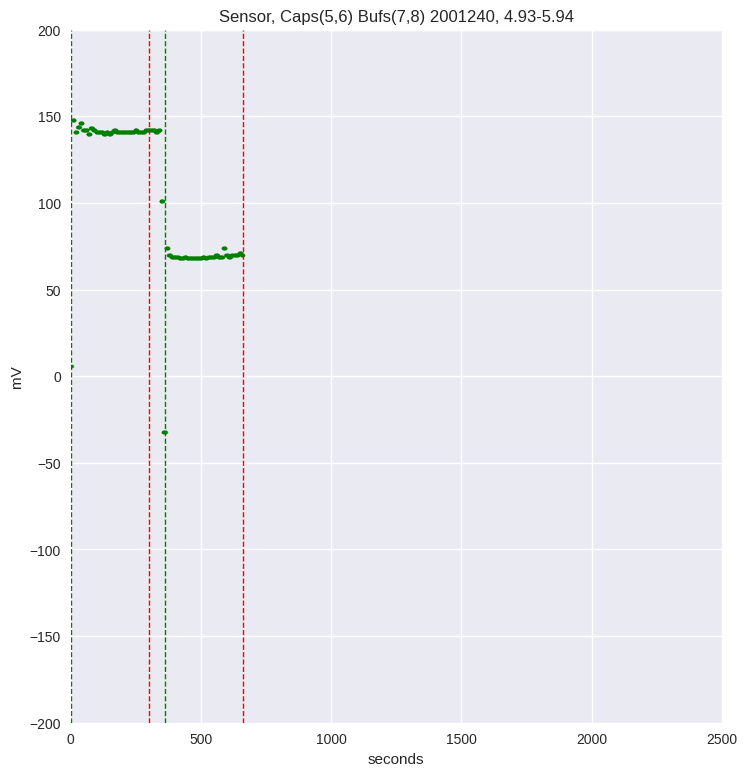

<ipython-input-17-55c06cc55c06>:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


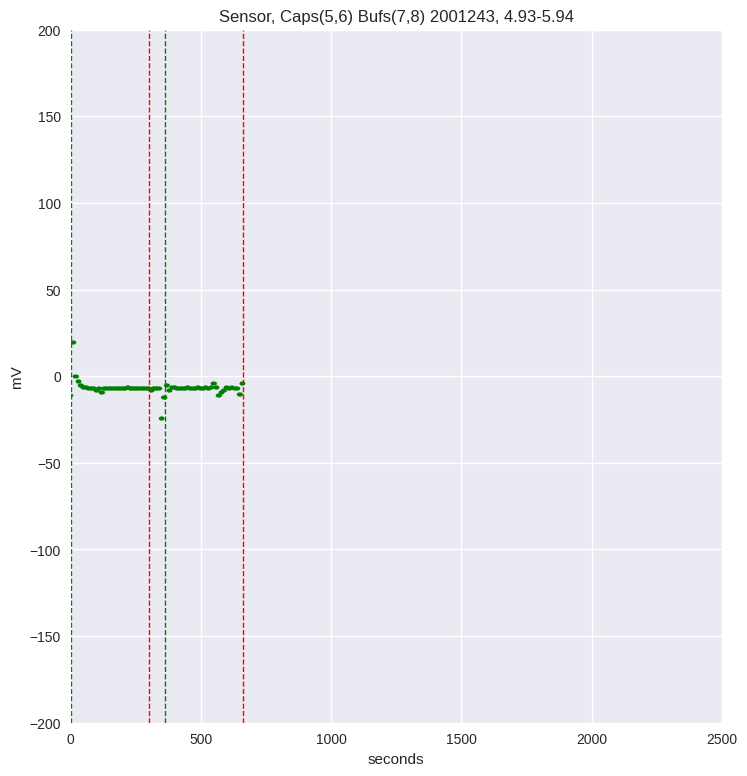

In [ ]:
# Plotting mV readings for all sensors in each pH buffer.
# Option: Do you want files created with each of the images?
create_sensor_time_plot_image_files = True

print('>>>Test sequence description: {}'.format(full_descr))
print('>>>Parameter sprdsht file: {}'.format(sprdshtfile))
print()

#Create a string showing the buffer pH values.
buffers_str = ''
for index, row in buffer_start_stop_df.iterrows():
  str_buff_pH = str(row['buffer_pH'])
  if '.' in str_buff_pH:
    buffers_str += str_buff_pH.rstrip('0').rstrip('.') + '-'
  else:
    buffers_str += str_buff_pH + '-'
buffers_str = buffers_str[0:-1]

for index, row in rs_pairs_df.iterrows():
    sensor_id = row['sensor_id']
    reader_sn = rs_pairs_df.loc[rs_pairs_df['sensor_id'] == sensor_id,'reader_sn'].iloc[0]
    testplot_df = data_df.loc[data_df['sn'] == reader_sn,['mV','test_sec']]

    xs = np.array(testplot_df['test_sec'])
    ys = np.array(testplot_df['mV'])

    style.use('seaborn')

    # Create a figure and axis
    fig, ax = plt.subplots()

    #f = plt.figure()
    fig.set_figwidth(8.4)
    fig.set_figheight(9)
    ax.scatter(xs,ys,label='mV',alpha=0.6, color='green', s=5)
    #plt.suptitle('mV  vs buffer pH', y=1.05, fontsize=18)
    ax.set_title(('Sensor, Caps(5,6) Bufs(7,8) {}, ' + buffers_str).format(sensor_id), fontsize=12)
    ax.set_xlabel('seconds')
    ax.set_xlim([0,2500])
    ax.set_ylabel('mV')
    ax.set_ylim([-200, 200])
    #ax.legend()
    #Add vertical reference lines
    # Loop through each row
    for _, vrow in buffer_start_stop_df.iterrows():
      ref_x_coord = get_closest_test_sec(data_df, vrow['start_ts'])
      ax.axvline(x=ref_x_coord, color='g', linestyle='--', linewidth=1)
      ref_x_coord = get_closest_test_sec(data_df, vrow['stop_ts'])
      ax.axvline(x=ref_x_coord, color='r', linestyle='--', linewidth=1)
      #ax.axvline(x=4, color='r', linestyle='--', label='x=4')
    if create_sensor_time_plot_image_files:
      fig.savefig(basedir + os.path.splitext(sprdshtfile)[0] +
                  '_sensor-time-plot_S' + str(row['sensor_id']) +
                  '.png', dpi=100)
    plt.show()


## FUNCTION FOR STATS

In [ ]:
# This is a function that is called later to processing statistics for a
# specified sensor in a specified buffer.
def process_one_sample_set(sensor_id, buffer_df_index):
    # Lookup Reader SN from the sensor_id
    #qrystr = 'sensor_id == @sensor_id'
    #reader_sn = rs_pairs_df.query(qrystr)['reader_sn'].iloc[0]
    try:
        reader_sn = rs_pairs_df.loc[rs_pairs_df['sensor_id'] == sensor_id, 'reader_sn'].iloc[0]
    except IndexError:
        reader_sn = None
    # Calc earliest data element to grab. Find the end
    end_ts = buffer_start_stop_df.iloc[buffer_df_index]['stop_ts']
    #print(end_ts)
    start_ts = buffer_start_stop_df.iloc[buffer_df_index]['start_ts']
    if testdefn['sample_start_sec'] < 0:
      sample_start_ts = end_ts + (testdefn['sample_start_sec'] * 1000)
      sample_end_ts = end_ts + (testdefn['sample_start_sec'] + testdefn['sample_sec_for_calcs'])*1000
      # NEED TO ADD AN ELSE FOR WHEN SAMPLE START SET is Positive (counts from the front)
    else:
      sample_start_ts = start_ts + (testdefn['sample_start_sec'] * 1000)
      sample_end_ts = sample_start_ts + (testdefn['sample_sec_for_calcs'])*1000

    full_instance_cnt = data_df[((data_df['pytimestamp'] >= start_ts) &
                                 (data_df['pytimestamp'] <= end_ts) &
                                 (data_df['sn'] == reader_sn))].shape[0]

    sample_query_df = data_df[((data_df['pytimestamp'] >= sample_start_ts) &
                               (data_df['pytimestamp'] <= sample_end_ts) &
                               (data_df['sn'] == reader_sn))]

    #Diag to see the actual data of a specified sample (sensor_id & pH).
    #if sensor_id == 1145 and buffer_start_stop_df.iloc[buffer_df_index]['buffer_pH'] == 5.14:
    #  sample_query_df.to_csv(basedir + sprdsht_basename + '_smpldf.csv', index = False)
    # process stats and push results into the results df
    samplecnt = sample_query_df.shape[0]
    samplemean = round(sample_query_df["mV"].mean(), 2)
    samplevar = round(sample_query_df["mV"].var(), 5)
    samplestd = round(sample_query_df["mV"].std(), 5)
    samplemnsq = round((sample_query_df['mV'].diff().apply(lambda x:x**2).sum())/(samplecnt - 1),3)
    #print('Sample count: {}, Mean: {}, Variance: {}, StdDev: {}'.
    #      format(samplecnt, samplemean, samplevar, samplestd))
    # return a dictionary
    return {'Test_date':testdefn['test_date'], 'Sensor_id':sensor_id,
            'Buffer_pH':buffer_start_stop_df.iloc[buffer_df_index]['buffer_pH'],
            'Buffer_start':buffer_start_stop_df.iloc[buffer_df_index]['start_time'],
            'Full_sample_dur':(buffer_start_stop_df.iloc[buffer_df_index]['stop_ts'] -
                               buffer_start_stop_df.iloc[buffer_df_index]['start_ts'])/60000,
            'Full_sample_cnt':full_instance_cnt, 'Calc_sample_secs':testdefn['sample_sec_for_calcs'],
            'sample_count':samplecnt, 'sample_mean':samplemean,
            'sample_var':samplevar,
            'smpl_mn_sq_dif':samplemnsq,
            'start_ts':start_ts,
            'smpl_start_ts':sample_start_ts,
            'smpl_end_ts':sample_end_ts}

##Generate stats
Stats for each sensor-buffer pair then write to file.

In [ ]:
# Loop through sensors and buffers to calculate mV sample stats
# for each sensor-buffer pair.

instance_stats_df = pd.DataFrame(columns =
                                 ['Test_date', 'Sensor_id', 'Buffer_pH',
                                  'Buffer_start', 'Full_sample_dur',
                                  'Full_sample_cnt', 'Calc_sample_secs',
                                  'sample_count', 'sample_mean',
                                  'sample_var', 'smpl_mn_sq_dif'])
for index, row in rs_pairs_df.iterrows():
    for buffer_df_index in range(0, len(buffer_start_stop_df.index)):
        print(f"Processing Sensor: {row['sensor_id']}, buffer index: {buffer_df_index}")
        one_instance_dict = process_one_sample_set(row['sensor_id'],
                                                   buffer_df_index)
        new_row_df = pd.DataFrame([one_instance_dict])
        instance_stats_df = pd.concat([instance_stats_df, new_row_df], ignore_index=True)


print('Test_date: {}'.format(instance_stats_df.at[0,'Test_date'])[0:21])
print('Sample from last {} seconds of time in the solution.'
       .format(instance_stats_df.at[0,'Calc_sample_secs']))
print('The following statistics are for measured differential',
      'voltage in millivolts (mV)')
instance_stats_df[['Sensor_id', 'Buffer_pH', 'Full_sample_cnt',
                   'sample_count', 'sample_mean', 'sample_var',
                   'smpl_mn_sq_dif']]

#instance_stats_df.columns = instance_stats_columns

Processing Sensor: 2001240, buffer index: 0
Processing Sensor: 2001240, buffer index: 1
Processing Sensor: 2001243, buffer index: 0
Processing Sensor: 2001243, buffer index: 1
Test_date: 2023-11-28
Sample from last 15 seconds of time in the solution.
The following statistics are for measured differential voltage in millivolts (mV)


,Sensor_id,Buffer_pH,Full_sample_cnt,sample_count,sample_mean,sample_var,smpl_mn_sq_dif
0,2001240,4.93,353,15,142.20,2.31429,0.643
1,2001240,5.94,339,16,69.62,0.25000,0.067
2,2001243,4.93,352,16,-1.69,2.36250,0.600
3,2001243,5.94,340,15,-7.07,1.06667,0.286


In [ ]:
# Write the sampling stats to an Excel file

# Write the full description to the top of the excel. THIS GETS REPLACED
# BY THE NEXT WRITE. NEEDS TO BE FIXED.
pd.Series(full_descr).to_excel(SUMMARY_DATA_OUTPUT_FILE, sheet_name='Sheet1',
                               startrow=0, startcol=0, header=False,
                               index=False)

# Write the dataframe below the text variable in the Excel file
instance_stats_df.to_excel(SUMMARY_DATA_OUTPUT_FILE, sheet_name='Sheet1',
                           startrow=1, startcol=0, index=False)

##Linear Regression calc and plots

In [ ]:
# Calculate linear regression for each Sensor and plot with mV vs Buffer_pH.
# Option: Do you want files created with each of the images?
if buffer_start_stop_df.shape[0] >= 3:
    create_calibration_image_files = True
    print('>>>Test sequence description: {}'.format(full_descr))
    print('>>>Parameter sprdsht file: {}'.format(sprdshtfile))
    print()
    calib_list = []
    resultsTxt = ''
    for index, row in rs_pairs_df.iterrows():
        sensor_id = row['sensor_id']

        qrystr = 'Sensor_id == @sensor_id'
        testplot_df = instance_stats_df[['Sensor_id', 'Buffer_pH',
                                        'sample_mean']].query(qrystr)
        testplot_df = testplot_df.dropna()
        xs = np.array(testplot_df['Buffer_pH'])
        ys = np.array(testplot_df['sample_mean'])
        mV_for_known_pH = linear_model.LinearRegression()
        mV_for_known_pH.fit(xs.reshape(-1,1),ys)
        regression_line = mV_for_known_pH.predict(xs.reshape(-1,1))
        slopeval = round(mV_for_known_pH.coef_[0], 2)
        intcpval = round(mV_for_known_pH.intercept_, 2)
        r2score = round(mV_for_known_pH.score(xs.reshape(-1,1),ys),4)

        style.use('seaborn')
        plt.scatter(xs,ys,label='mV',alpha=0.6, color='green', s=75)
        plt.plot(xs,regression_line,label='Best Fit Line', color='orange',
                linewidth=4)
        #plt.suptitle('mV  vs buffer pH', y=1.05, fontsize=18)
        plt.title('Sensor {}: Slope={}, Intercept={}, R2={}'.
                  format(sensor_id,slopeval, intcpval, r2score), fontsize=12)
        plt.xlabel('Buffer pH')
        plt.ylabel('mV')
        plt.ylim([-100, 200])
        plt.legend()
        if create_calibration_image_files:
          plt.savefig(basedir + os.path.splitext(sprdshtfile)[0] +
                      '_calibration-plot_S' + str(row['sensor_id']) + '.png', dpi=100)
        plt.show()
        calib_list.append((sensor_id, slopeval, intcpval, r2score))
        #print('Slope: {}, Intercept: {}'.format(slopeval, intcpval))
        sensorResultsTxt = (f"TestDate={testdefn['test_date'].strftime('%m/%d/%Y')}, " +
                            f'Sensor={sensor_id}, Slope={slopeval},' +
                            f'Intercept={intcpval}, R2={r2score}')
        resultsTxt += sensorResultsTxt + '\n'
    print('Summary - - - - - - - - - - ')
    print(resultsTxt)
    # Write summary results to a file
    if create_calibration_image_files:
        with open(basedir + os.path.splitext(sprdshtfile)[0] +
                  '_regr_smry.txt', 'w') as writefile:
            writefile.write(resultsTxt)

##LUT table generation and QR

In [ ]:
# NO LONGER USED! Function to create a QR code img file NOT USED!
def write_qr_img(qrcontent,imgpath, imglabel=''):
  # required once with each session for generating QR codes.
  from PIL import Image, ImageDraw, ImageFont

  # Generate QR code
  qr = qrcode.QRCode(
      version=1,
      error_correction=qrcode.constants.ERROR_CORRECT_L,
      box_size=3,
      border=4,
  )
  qr.add_data(qrcontent)
  qr.make(fit=True)

  # Create an Image object from the QR Code instance
  img = qr.make_image(fill_color="black", back_color="white")

  if imglabel != '':
    font_size = 22
    #font = ImageFont.truetype("arial.ttf", font_size)  # Use any available TrueType font
    font = ImageFont.load_default()
    width, height = img.size
    label_width, label_height = font.getsize(imglabel)
    label_img = Image.new('RGB', (width, height + label_height + 10), color="white")
    d = ImageDraw.Draw(label_img)
    # Place QR code
    label_img.paste(img, (0, 0))
    # Add label
    d.text(((width - label_width) / 2, height + 5), imglabel, font=font, fill="black")


  # Save the image
  img.save(imgpath)

In [ ]:
# Create dict with meta data for the test and a list of Sensor data
# (Sensor_id as name. List of Buff_pH / mV as value).
if buffer_start_stop_df.shape[0] >= 3:
    try:
      import qrcode
      print('Successfully imported the module for QR codes so no installation needed.')
    except ImportError:
      !pip3 install qrcode[pil]
      import qrcode

    if 1 == 1:
        import json
        qr = qrcode.QRCode(
            version=1,
            error_correction=qrcode.constants.ERROR_CORRECT_L,
            box_size=10,
            border=4,
        )
        first_test = buffer_start_stop_df.iloc[0]
        last_test = buffer_start_stop_df.iloc[-1]
        sensor_bufmV_dict = {'test_seq_params':
                                  {'testing_lab':testdefn['testing_lab'],
                                  'timezone_utc_offset':testdefn['timezone_utc_offset'],
                                  'technician':testdefn['technician'],
                                  'we_source':testdefn['we_source'],
                                  're_source':testdefn['re_source'],
                                  'test_type':testdefn['test_type'],
                                  'time_in_buffer_min':testdefn['time_in_buffer_min'],
                                  'conditioning_time_min':testdefn['conditioning_time_min'],
                                  'conditioning_substance':testdefn['conditioning_substance'],
                                  'test_date':testdefn['test_date'].strftime("%m/%d/%Y"),
                                  'first_start_time':testdefn['first_start_time'].strftime("%H:%M:%S"),
                                  'first_start_ts':str(first_test['start_ts']),
                                  'last_stop_time':testdefn['last_stop_time'].strftime("%H:%M:%S"),
                                  'last_stop_ts':str(last_test['stop_ts']),
                                  'sample_sec_for_calcs':testdefn['sample_sec_for_calcs'],
                                  'sample_start_sec':testdefn['sample_start_sec'],
                                  'comments':testdefn['comments']
                                  },
                            'sensor_data':{}
                            }
        # Loop through sensors
        # Creating copy of instance_stats
        stats_df = instance_stats_df[['Buffer_pH','sample_mean']]
        stats_df.columns = ['buf','mV']
        #    Loop thru the Sensor IDs
        for rdrid,snsrid in list(rs_pairs_df.to_records(index=False)):
            rdrid = str(rdrid) # Reader ID is commonly used as a string
            snsrid = int(snsrid) # Needs to be an int for lookup several lines down.
            buf_mV_pairs = (stats_df.loc[
                                  instance_stats_df['Sensor_id'] == snsrid].
                                  to_dict(orient='records'))

            # Create a Reader and linear regression name-value pairs
            senstup = [snsr for snsr in calib_list if snsr[0] == snsrid]
            #print(senstup[0])
            snsr_specific_dct = {'test_rdr':rdrid,'lin_regr':{'slope':senstup[0][1],'intcp':senstup[0][2]}}
            #print(snsr_specific_dct)

            sensor_bufmV_dict['sensor_data'][snsrid] = snsr_specific_dct

            sensor_bufmV_dict['sensor_data'][snsrid]['buf_mV_pts'] = buf_mV_pairs

            #create individual QR codes for the sensors
            snsr_qr_dct = {'sensor_id':f'{snsrid}', # The sensor_id must be coerced to a string so that it will be quoted - for OffCode
                          'lin_regr':{'slope':senstup[0][1],'intcp':senstup[0][2]},
                          'buf_mV_pts':buf_mV_pairs}
            #print(json.dumps(snsr_qr_dct, indent=4))
            #write_snsr_qr_json(json.dumps(snsr_qr_dct, indent=4),
            #            basedir + os.path.splitext(sprdshtfile)[0] + f'_calib_{snsrid}.json')
            snsrcalib_file_path = basedir + os.path.splitext(sprdshtfile)[0] + f'_calib_{snsrid}.json'
            with open(snsrcalib_file_path, 'w') as scfp:
                json.dump(snsr_qr_dct, scfp, indent=4)

        #print(json.dumps(sensor_bufmV_dict, indent=4))
        bufmV_file_path = basedir + os.path.splitext(sprdshtfile)[0] + '_bufmV.json'
        with open(bufmV_file_path, 'w') as fp:
            json.dump(sensor_bufmV_dict, fp, indent=4)
        print(f'Calibration file written to \n{bufmV_file_path}.')

        #    Loop thru the Sensor IDs again to produce individual QR Sensor images
        #for rdrid,snsrid in list(rs_pairs_df.to_records(index=False)):
        #  snsr_qr_dict = {}


In [ ]:

input('Done!  Press Enter to close this message.')

Done!  Press Enter to close this message.


''

\- - - - - - - - - - - - - - - - - - - - end of test sequence data - - - - - - - - - - - - - - - - - - - -

In [ ]:
# If there is a need to use the path for a bash statement then use this code
if 1 == 11:
  def escape_for_bash(path):
    path = path.replace(' ', r'\ ')
    path = path.replace('(', r'\(')
    path = path.replace(')', r'\)')
    return path

  bashbasedir = escape_for_bash(basedir)
  !ls -al $bashbasedir